In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

num_classes = len(np.unique(train_labels))
print("تعداد کلاس‌ها:", num_classes)


تعداد کلاس‌ها: 10


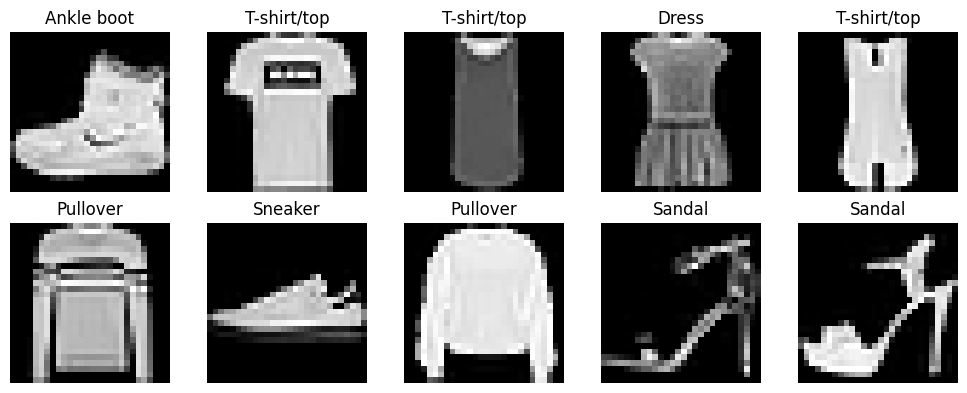

In [5]:
# تعریف نام کلاس‌ها برای خوانایی بیشتر
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# نمایش 10 تصویر اول از دیتاست آموزش
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
# نرمال‌سازی پیکسل‌ها به بازه ۰ تا ۱
train_images = train_images / 255.0
test_images = test_images / 255.0

# تبدیل ابعاد تصاویر از ۲۸×۲۸ به ۷۸۴ (برای استفاده در Dense)
train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

print("شکل نهایی داده آموزش:", train_images.shape)
print("شکل نهایی داده تست:", test_images.shape)


شکل نهایی داده آموزش: (60000, 784)
شکل نهایی داده تست: (10000, 784)


In [ ]:
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# آموزش مدل روی داده آموزش با ۱۰ دوره 
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, verbose=1)


c:\Users\DELL\Desktop\Sharif_DL_Project\dlenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8231 - loss: 0.4987 - val_accuracy: 0.8528 - val_loss: 0.4070
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8634 - loss: 0.3745 - val_accuracy: 0.8485 - val_loss: 0.4110
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8767 - loss: 0.3365 - val_accuracy: 0.8697 - val_loss: 0.3549
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8838 - loss: 0.3138 - val_accuracy: 0.8800 - val_loss: 0.3182
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8900 - loss: 0.2932 - val_accuracy: 0.8798 - val_loss: 0.3368
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8958 - loss: 0.2792 - val_accuracy: 0.8740 - val_loss: 0.3656
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9004 - loss: 0.2664 - val_accuracy: 0.8832 - val_loss: 0.3336
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9046 - loss: 

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("دقت نهایی روی داده تست:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8786 - loss: 0.3493
دقت نهایی روی داده تست: 0.878600001335144
